In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [38]:
from pathlib import Path
import librosa
import numpy as np

bird = "puaioh"
examples = list(Path("../data/raw/birdclef-2022/train_audio").glob(f"{bird}/*.ogg"))
example = examples[0]
example

data, sample_rate = librosa.load(example)
duration = librosa.get_duration(y=data, sr=sample_rate)
print(f"{example}, {duration:.2f} seconds")

..\data\raw\birdclef-2022\train_audio\puaioh\XC144892.ogg, 28.78 seconds


In [39]:
import matplotlib.pyplot as plt
import librosa.display
from simple import simple_fast

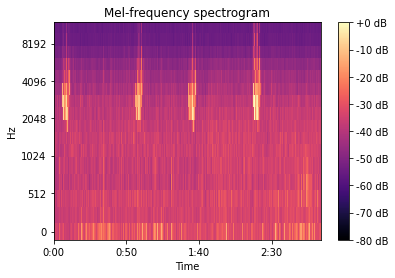

In [40]:
S = librosa.feature.melspectrogram(
    y=data, sr=sample_rate, n_fft=2048, hop_length=80, n_mels=16
)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sample_rate)
plt.colorbar(img, format="%+2.0f dB")
plt.title("Mel-frequency spectrogram")
plt.show()

In [47]:
S.shape

(16, 7932)

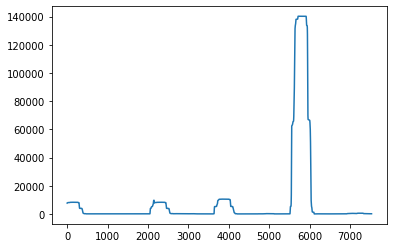

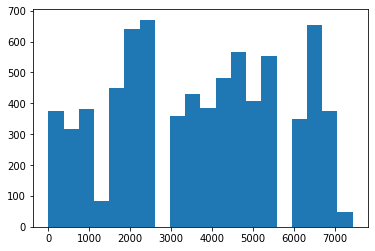

In [48]:
mp_window = 80 * 5
mp, pi = simple_fast(S, S, mp_window)
motif = np.argmin(mp)
idx = int(motif), int(pi[motif])
discord = np.argmax(mp)
idx_discord = int(discord), int(pi[discord])

plt.plot("matrix profile ")
plt.plot(mp)
plt.show()
plt.hist(pi, bins=20)
plt.show()

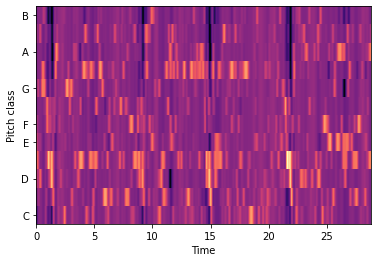

In [43]:
from birdclef.utils import cens_per_sec

cens_sr = 100

duration = librosa.get_duration(y=data, sr=sample_rate)
hop_length = cens_per_sec(sample_rate, cens_sr)
cens = librosa.feature.chroma_cens(y=data, sr=sample_rate, hop_length=hop_length)

librosa.display.specshow(cens, y_axis="chroma", x_axis="time", hop_length=hop_length)

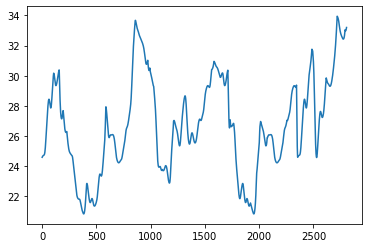

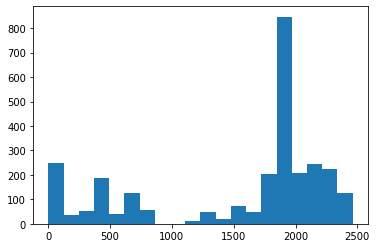

In [49]:
mp_window = 500

mp, pi = simple_fast(cens, cens, mp_window)
motif = np.argmin(mp)
idx = int(motif), int(pi[motif])
discord = np.argmax(mp)
idx_discord = int(discord), int(pi[discord])

plt.plot(mp)
plt.show()
plt.hist(pi, bins=20)
plt.show()